In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
#experiment_folder = './paper_experiment_1'
#experiment_folder = './paper_experiment_2'
experiment_folder = './paper_experiment_3'

In [3]:
images_folder = f"{experiment_folder}/images" 
if not os.path.exists(f"{experiment_folder}/images"):
    os.makedirs(images_folder)

In [4]:

df = pd.read_csv(f"{experiment_folder}/merged_of_satellite_satellite_number.csv")

df.replace(" ms", "", regex=True, inplace=True)
df.replace("Los-Angeles", "LA", regex=True, inplace=True)
df.replace("New-York", "NY", regex=True, inplace=True)
df.replace("Mexico-City", "Mex", regex=True, inplace=True)
df.replace("Barcelona", "Bar", regex=True, inplace=True)
df.replace("Sidney", "Sydn", regex=True, inplace=True)
df.replace("Madrid", "Mad", regex=True, inplace=True)
df.replace("Bogota", "Bog", regex=True, inplace=True)
df.replace("Riyadh", "Riy", regex=True, inplace=True)

df.to_csv(f"{experiment_folder}/merged_of_satellite_satellite_number_clean.csv", index=False)

In [5]:
# Colores para las columnas
column_colors = {
    'Mean RTT_telesat': '#1f77b4',
    'Mean RTT_kuiper': '#ff7f0e',
    'Mean RTT_starlink': '#2ca02c',
    'min_of': '#d62728',
    'Expected_Latency_of': '#9467bd'
}

column_names = {
    'Mean RTT_telesat': 'Telesat',
    'Mean RTT_kuiper': 'Kuiper',
    'Mean RTT_starlink': 'Starlink',
    'min_of': 'Optical Fiber',
    'Expected_Latency_of': 'Optical Fiber theoretical'
}

complete_names = {
    "Mad": "Madrid",
    "Bar": "Barcelona",
    "Riy": "Riyadh",
    "LA": "Los Angeles",
    "NY": "New York",
    "Mx": "Mexico City",
    "Bog": "Bogota",
    "Cai": "Cairo",
    "Tok": "Tokyo", 
    "Sydn": "Sydney"
}


In [6]:
df = pd.read_csv(f"{experiment_folder}/merged_of_satellite_satellite_number_clean.csv")
df = df.dropna(subset=['Distance_of'])
df.loc[:, 'Distance_of'] = df['Distance_of'].str.replace(',', '.').astype(float)
df.loc[:, 'avg_of'] = df['avg_of'].str.replace(',', '.').astype(float)
df.loc[:, 'min_of'] = df['min_of'].str.replace(',', '.').astype(float)
df.loc[:, 'Expected_Latency_of'] = df['Expected_Latency_of'].str.replace(',', '.').astype(float)
df.loc[:, 'Mean RTT_telesat'] = df['Mean RTT_telesat'].astype(float)
df.loc[:, 'Mean RTT_kuiper'] = df['Mean RTT_kuiper'].astype(float)
df.loc[:, 'Mean RTT_starlink'] = df['Mean RTT_starlink'].astype(float)
df.loc[:, 'satellites_telesat'] = df['satellites_telesat'].astype(str).str.replace(',', '.').astype(float)
df.loc[:, 'satellites_kuiper'] = df['satellites_kuiper'].astype(str).str.replace(',', '.').astype(float)
df.loc[:, 'satellites_starlink'] = df['satellites_starlink'].astype(str).str.replace(',', '.').astype(float)
df.loc[:, 'satellites_distance_telesat'] = df['satellites_distance_telesat'].str.replace(',', '.').astype(float)
df.loc[:, 'satellites_distance_kuiper'] = df['satellites_distance_kuiper'].str.replace(',', '.').astype(float)
df.loc[:, 'satellites_distance_starlink'] = df['satellites_distance_starlink'].str.replace(',', '.').astype(float)
df = df.sort_values(by='Distance_of') 
cities = pd.concat([df['origin_name'], df['destination_name']]).unique()

/tmp/ipykernel_16182/975893394.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Distance_of'] = df['Distance_of'].str.replace(',', '.').astype(float)
/tmp/ipykernel_16182/975893394.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'avg_of'] = df['avg_of'].str.replace(',', '.').astype(float)
/tmp/ipykernel_16182/975893394.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.

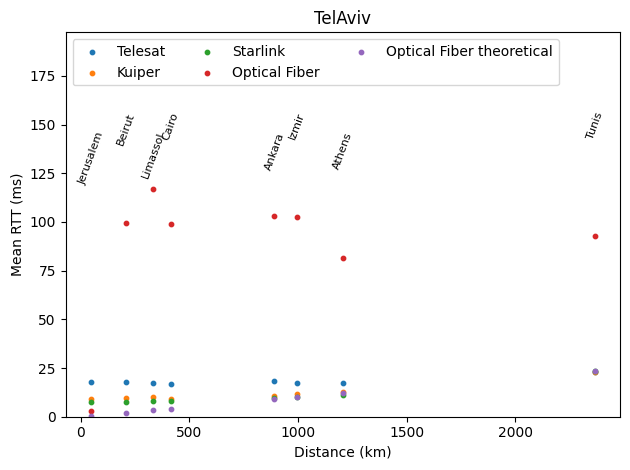

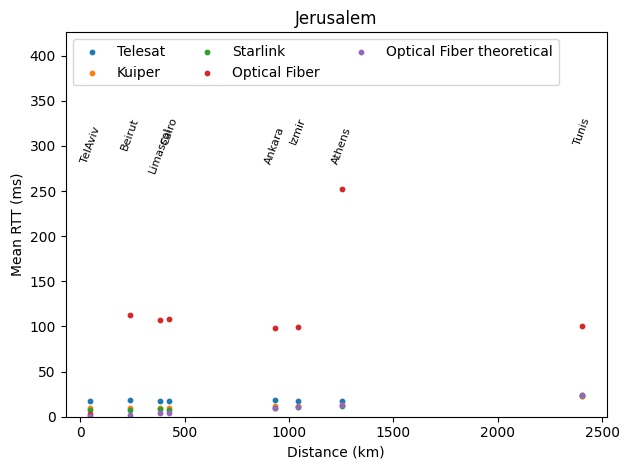

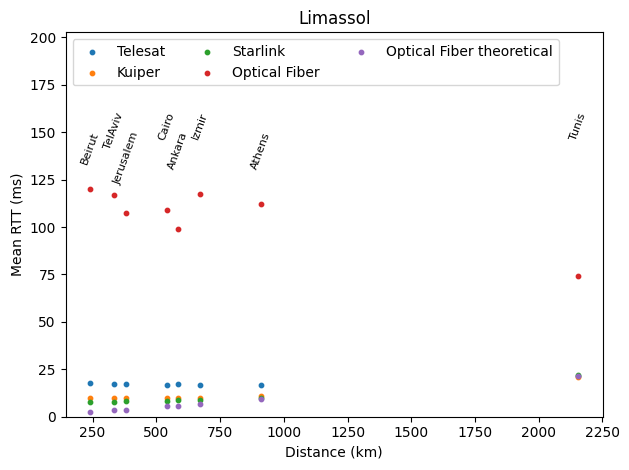

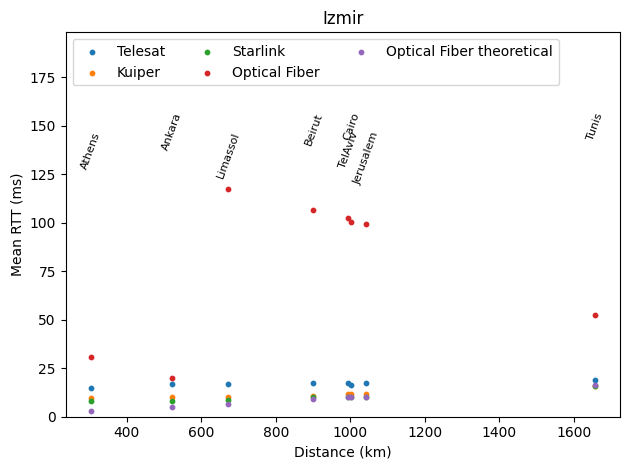

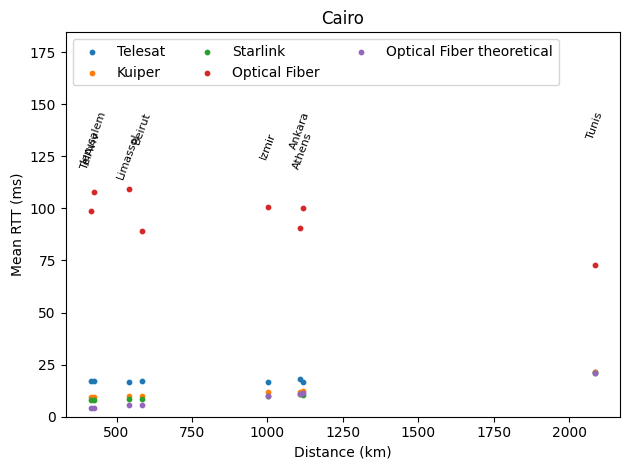

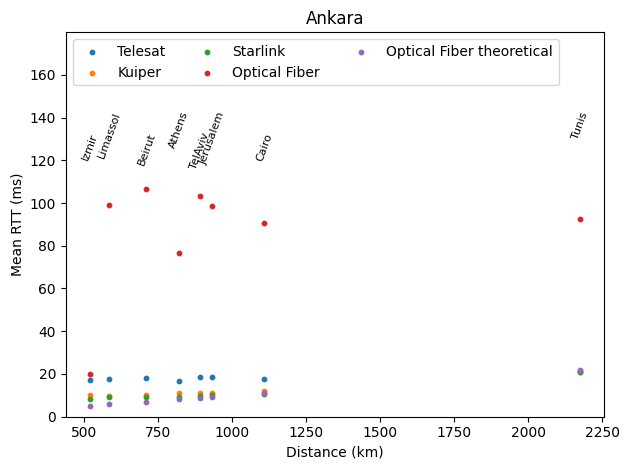

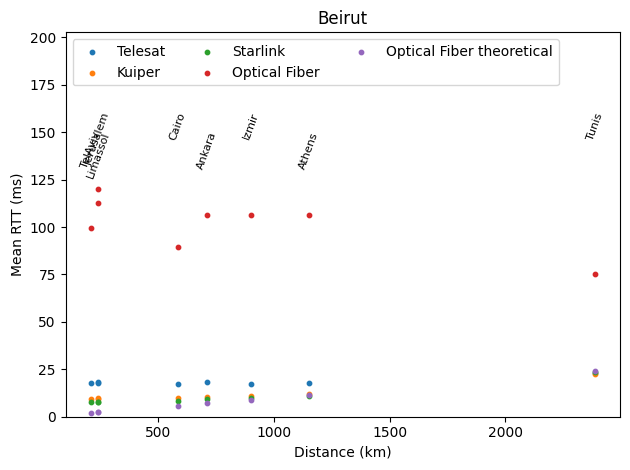

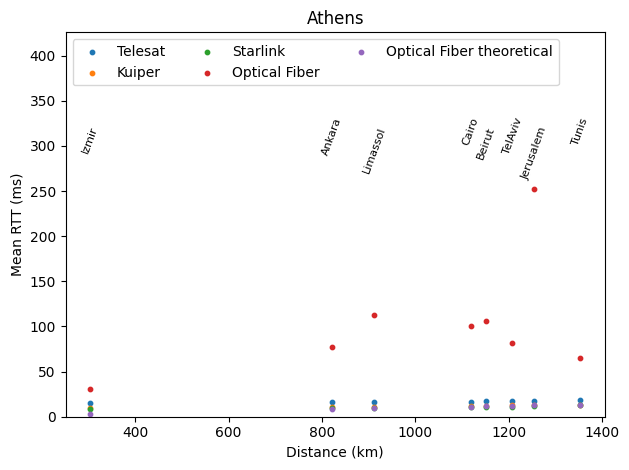

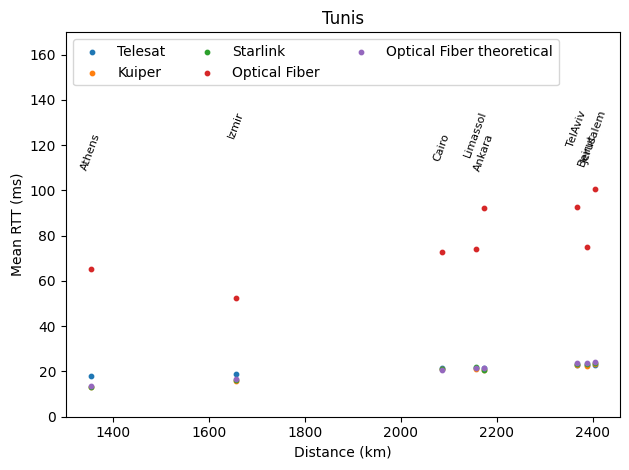

In [7]:
general_experiment_title = "Mean RTT from one city to others"


for city in cities:
    experiment_title = f"{city}" 
    city_connections = df[(df['origin_name'] == city) | (df['destination_name'] == city)]
    data = city_connections.copy()
    plt.scatter(data['Distance_of'], data['Mean RTT_telesat'], label=column_names['Mean RTT_telesat'], color=column_colors['Mean RTT_telesat'], s=10)
    plt.scatter(data['Distance_of'], data['Mean RTT_kuiper'], label=column_names['Mean RTT_kuiper'], color=column_colors['Mean RTT_kuiper'], s=10)
    plt.scatter(data['Distance_of'], data['Mean RTT_starlink'], label=column_names['Mean RTT_starlink'], color=column_colors['Mean RTT_starlink'], s=10)
    plt.scatter(data['Distance_of'], data['min_of'], label=column_names['min_of'], color=column_colors['min_of'], s=10)
    plt.scatter(data['Distance_of'], data['Expected_Latency_of'], label=column_names['Expected_Latency_of'], color=column_colors['Expected_Latency_of'], s=10)


    y_max_pos = data[['Mean RTT_telesat', 'Mean RTT_kuiper', 'Mean RTT_starlink', 'min_of', 'Expected_Latency_of']].max().max()*1.3
    i = 0
    for index, row in data.iterrows():
        i += 1
        if row['origin_name'] == city:
            city_name = row['destination_name']
        else:
            city_name = row['origin_name']
        
        if i % 2 == 0:
            penalty = + 5
        else:
            penalty = - 5
        plt.text(row['Distance_of'], y_max_pos + penalty, city_name, ha='center', va='top', rotation=70, fontsize=8)

    plt.title(experiment_title)
    plt.xlabel('Distance (km)')
    plt.ylabel('Mean RTT (ms)')
    plt.ylim(0, y_max_pos*1.3)
    plt.legend(loc='upper left', ncol=3)
    
    plt.tight_layout()

    plt.savefig(f"{experiment_folder}/images/{experiment_title}.png")
    plt.show()


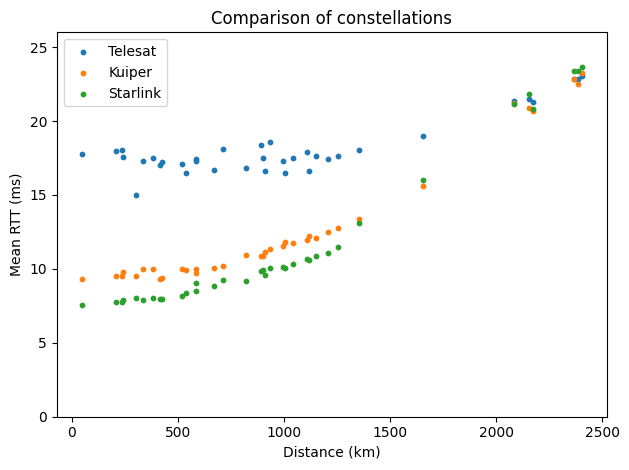

In [8]:

experiment_title = "Comparison of constellations"

data = df.copy()

plt.scatter(data['Distance_of'], data['Mean RTT_telesat'], label=column_names['Mean RTT_telesat'], color=column_colors['Mean RTT_telesat'], s=10)
plt.scatter(data['Distance_of'], data['Mean RTT_kuiper'], label=column_names['Mean RTT_kuiper'], color=column_colors['Mean RTT_kuiper'], s=10)
plt.scatter(data['Distance_of'], data['Mean RTT_starlink'], label=column_names['Mean RTT_starlink'], color=column_colors['Mean RTT_starlink'], s=10)

plt.title(experiment_title)
plt.xlabel('Distance (km)')
plt.ylabel('Mean RTT (ms)')
y_max_pos = data[['Mean RTT_telesat', 'Mean RTT_kuiper', 'Mean RTT_starlink']].max().max()
plt.ylim(0, y_max_pos*1.1)
plt.legend(loc='upper left', ncol=1)

plt.tight_layout()
plt.savefig(f"{experiment_folder}/images/{experiment_title}.png")

plt.show()

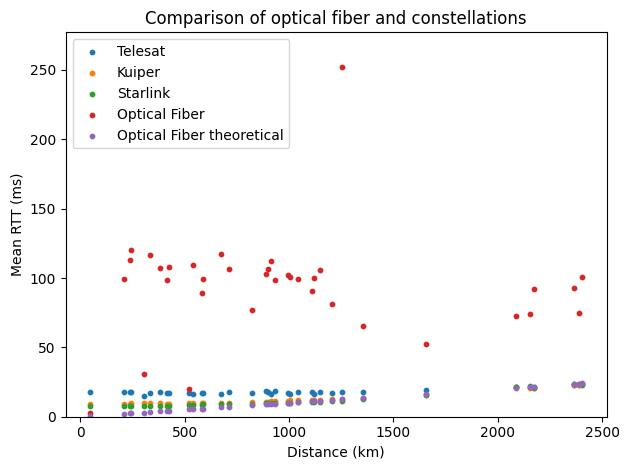

In [9]:
experiment_title = "Comparison of optical fiber and constellations"
data = df.copy()

plt.scatter(data['Distance_of'], data['Mean RTT_telesat'], label=column_names['Mean RTT_telesat'], color=column_colors['Mean RTT_telesat'], s=10)
plt.scatter(data['Distance_of'], data['Mean RTT_kuiper'], label=column_names['Mean RTT_kuiper'], color=column_colors['Mean RTT_kuiper'], s=10)
plt.scatter(data['Distance_of'], data['Mean RTT_starlink'], label=column_names['Mean RTT_starlink'], color=column_colors['Mean RTT_starlink'], s=10)
plt.scatter(data['Distance_of'], data['min_of'], label=column_names['min_of'], color=column_colors['min_of'], s=10)
plt.scatter(data['Distance_of'], data['Expected_Latency_of'], label=column_names['Expected_Latency_of'], color=column_colors['Expected_Latency_of'], s=10)

y_max_pos = data[['Mean RTT_telesat', 'Mean RTT_kuiper', 'Mean RTT_starlink', 'min_of']].max().max()*1.3
plt.title(experiment_title)
plt.xlabel('Distance (km)')
plt.ylabel('Mean RTT (ms)')
y_max_pos = data[['Mean RTT_telesat', 'Mean RTT_kuiper', 'Mean RTT_starlink', 'min_of']].max().max()
plt.ylim(0, y_max_pos*1.1)
plt.legend(loc='upper left', ncol=1)

plt.tight_layout()
plt.savefig(f"{experiment_folder}/images/{experiment_title}.png")

plt.show()

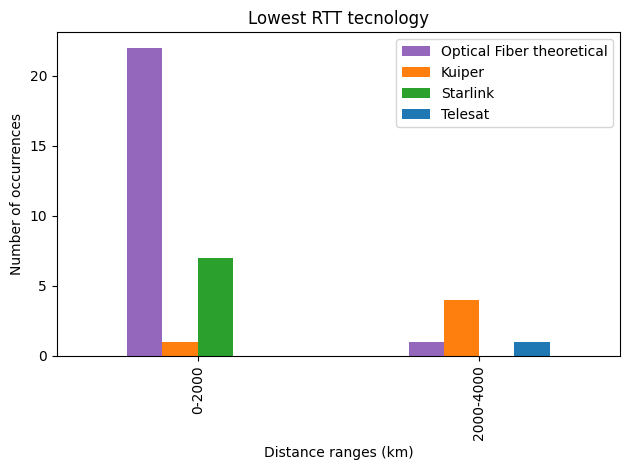

In [10]:
experiment_title = "Lowest RTT tecnology"
data = df.copy()

distance_step = 2000

categories = ['Mean RTT_telesat', 'Mean RTT_kuiper', 'Mean RTT_starlink', 'min_of', 'Expected_Latency_of']
data['winner'] = data[categories].idxmin(axis=1)
data['distance_group'] = (data['Distance_of'] // distance_step * distance_step).astype(int)


grouped_data = data.groupby(['distance_group', 'winner']).size().unstack().sort_index()


ax = grouped_data.plot(kind='bar', stacked=False, color=[column_colors.get(col, '#1f77b4') for col in grouped_data.columns])

legend_labels = [column_names.get(col, col) for col in grouped_data.columns]
ax.legend(legend_labels, title='')



def getxTicks(x_group_points, distance_step):
    new_x = []
    for x in x_group_points:
        x = int(x)
        new_x.append(str(x // distance_step * distance_step) + "-" + str(x // distance_step * distance_step + distance_step))
    return new_x


plt.xlabel('Distance ranges (km)')
plt.ylabel('Number of occurrences')
plt.title(experiment_title)

x_group_points = data['distance_group'].unique()
x_ticks = getxTicks(x_group_points, distance_step)

plt.xticks(range(len(x_group_points)), x_ticks)  

plt.tight_layout()
plt.savefig(f"{experiment_folder}/images/{experiment_title}.png")

plt.show()


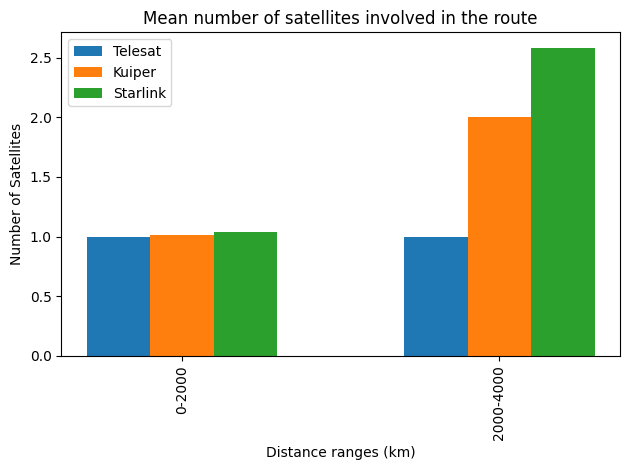

In [11]:
experiment_title = "Mean number of satellites involved in the route"

data = df.copy()

distance_step = 2000

data['distance_group'] = (data['Distance_of'] // distance_step * distance_step).astype(int)
grouped_data = data.groupby('distance_group')[['satellites_telesat', 'satellites_kuiper', 'satellites_starlink']].mean()

telesat_values = grouped_data['satellites_telesat'].values.tolist()
kuiper_values = grouped_data['satellites_kuiper'].values.tolist()
starlink_values = grouped_data['satellites_starlink'].values.tolist()

distance_labels = grouped_data.index.values.astype(str).tolist()

bar_width = 0.2
bar_positions = np.arange(len(distance_labels))


plt.bar(bar_positions - bar_width, telesat_values, width=bar_width, color=column_colors["Mean RTT_telesat"], label=column_names["Mean RTT_telesat"])
plt.bar(bar_positions, kuiper_values, width=bar_width, color=column_colors["Mean RTT_kuiper"], label=column_names["Mean RTT_kuiper"])
plt.bar(bar_positions + bar_width, starlink_values, width=bar_width, color=column_colors["Mean RTT_starlink"], label=column_names["Mean RTT_starlink"])


x_group_points = data['distance_group'].unique()
x_ticks = getxTicks(x_group_points, distance_step)

plt.xticks(range(len(x_group_points)), x_ticks, rotation='vertical')  

plt.xlabel('Distance ranges (km)')
plt.ylabel('Number of Satellites')
plt.title(experiment_title)
plt.legend()
plt.tight_layout()
plt.savefig(f"{experiment_folder}/images/{experiment_title}.png")

plt.show()



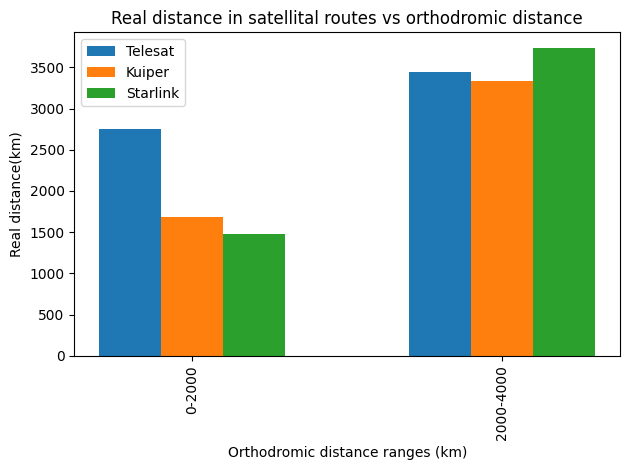

In [12]:
experiment_title = "Real distance in satellital routes vs orthodromic distance"

data = df.copy()

distance_step = 2000

data['distance_group'] = (data['Distance_of'] // distance_step * distance_step).astype(int)
grouped_data = data.groupby('distance_group')[['satellites_distance_telesat', 'satellites_distance_kuiper', 'satellites_distance_starlink', ]].mean()

telesat_values = grouped_data['satellites_distance_telesat'].values.tolist()
kuiper_values = grouped_data['satellites_distance_kuiper'].values.tolist()
starlink_values = grouped_data['satellites_distance_starlink'].values.tolist()

distance_labels = grouped_data.index.values.astype(str).tolist()

bar_width = 0.2
bar_positions = np.arange(len(distance_labels))


plt.bar(bar_positions - bar_width, telesat_values, width=bar_width, color=column_colors["Mean RTT_telesat"], label=column_names["Mean RTT_telesat"])
plt.bar(bar_positions, kuiper_values, width=bar_width, color=column_colors["Mean RTT_kuiper"], label=column_names["Mean RTT_kuiper"])
plt.bar(bar_positions + bar_width, starlink_values, width=bar_width, color=column_colors["Mean RTT_starlink"], label=column_names["Mean RTT_starlink"])

x_group_points = data['distance_group'].unique()
x_ticks = getxTicks(x_group_points, distance_step)

plt.xticks(range(len(x_group_points)), x_ticks, rotation='vertical') 

plt.xlabel('Orthodromic distance ranges (km)')
plt.ylabel('Real distance(km)')
plt.title(experiment_title)
plt.legend()

plt.tight_layout()
plt.savefig(f"{experiment_folder}/images/{experiment_title}.png")

plt.show()